# L3 - Math3-ML - MACHINE LEARNING
## Objectifs du TP6 - régression avec sklearn


Actuellement, l'apprentissage statistique (machine learning) en python se fait essentiellement avec le package très complet nommé `scikit-learn`. Ainsi durant les TP 4, 5 et 6 nous verrons comment l'utiliser dans les différents cas statistiques que nous pouvons rencontrer. 

![](apprentissage1.png)

Durant le TP5 nous nous concentrerons sur les cas de la régression. 

En reprenant les notations standards, soit $X \in \mathbb{R}^{n \times p}$ une matrice exprimant $p$ variables pour $n$ individus. Soit $Y \in \mathbb{R}^n$ une variable continue réponse que nous essayons à prédire. 

Ce TP a pour but d'explorer le traitement des features (nettoyage et préparation), de comparer et comprendre certains algorithmes de regression. 

# Préparation du jeu de données 

Pour commencer ce TP nous allons utiliser les données immobiliaires en californie. Le but ici est de prédire le prix d'une maison californienne. 

Récuperer le fichier csv disponible sur moodle et importer le. On mettra dans une variable `target` la variable target et garderons les autres variables dans une matrice $X$. 

Afin de visualiser facilement ces données, nous utiliserons une méthode de réduction de dimension "Analyse en composante principale" dite ACP (ou PCA en anglais). Nous ne nous attarderons pas dans ce TP à comprendre comment elle fonctionne mais pourrons être amener à l'utiliser afin de réduire des dimensions de jeux de données pour l'exécution des méthodes de machine learning comme pour de la visualisation. 

In [78]:
import numpy as np

In [10]:
import sklearn
from sklearn import datasets
X, y = sklearn.datasets.fetch_california_housing(return_X_y = True, as_frame = True)
sample = np.random.choice(X.index, int(0.1*X.shape[0]))

In [11]:
X = X.loc[sample]
y = y.loc[sample]


In [12]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000
mean,3.865306,28.555233,5.467860,1.102665,1476.109496,3.099675,35.617272,-119.543692
std,1.876857,12.730201,2.359325,0.469283,1152.828194,5.362317,2.140650,1.996076
min,0.499900,2.000000,1.654440,0.769231,13.000000,1.066176,32.550000,-124.230000
25%,2.553275,18.000000,4.483687,1.006911,819.250000,2.429869,33.930000,-121.692500
50%,3.540400,29.000000,5.276644,1.049011,1199.500000,2.829077,34.265000,-118.485000
75%,4.743925,37.000000,6.117389,1.099499,1785.000000,3.274743,37.710000,-117.990000
max,15.000100,52.000000,52.848214,11.410714,13251.000000,230.172414,41.860000,-114.590000


In [82]:
x_replace = np.random.choice(X.index, int(0.01*X.shape[0]))
X.loc[x_replace,"HouseAge"] = - X.loc[x_replace,"HouseAge"]
X.loc[x_replace,"HouseAge"]
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000
mean,3.984262,27.707364,5.524991,1.097188,1396.452519,2.953778,35.612854,-119.533953,2.112426
std,1.965996,13.707654,2.533052,0.483759,1227.010771,1.229874,2.148793,2.018923,1.168051
min,0.536000,-46.000000,1.411290,0.659574,15.000000,1.161290,32.570000,-124.270000,0.329000
25%,2.625000,18.000000,4.532763,1.005242,784.000000,2.421121,33.930000,-121.810000,1.236750
50%,3.651600,28.000000,5.298452,1.045455,1169.500000,2.806168,34.220000,-118.460000,1.838500
75%,4.855825,37.000000,6.124244,1.094628,1684.250000,3.258310,37.710000,-117.957500,2.706250
max,15.000100,52.000000,62.422222,14.111111,35682.000000,33.952941,41.950000,-114.490000,5.000010


In [83]:
x_replace = np.random.choice(X.index, int(0.05*X.shape[0]))
X.loc[x_replace,"MedInc"] = np.NaN
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,1951.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000
mean,4.007126,27.707364,5.524991,1.097188,1396.452519,2.953778,35.612854,-119.533953,2.112426
std,1.973766,13.707654,2.533052,0.483759,1227.010771,1.229874,2.148793,2.018923,1.168051
min,0.536000,-46.000000,1.411290,0.659574,15.000000,1.161290,32.570000,-124.270000,0.329000
25%,2.639650,18.000000,4.532763,1.005242,784.000000,2.421121,33.930000,-121.810000,1.236750
50%,3.661900,28.000000,5.298452,1.045455,1169.500000,2.806168,34.220000,-118.460000,1.838500
75%,4.878300,37.000000,6.124244,1.094628,1684.250000,3.258310,37.710000,-117.957500,2.706250
max,15.000100,52.000000,62.422222,14.111111,35682.000000,33.952941,41.950000,-114.490000,5.000010


In [84]:
X ["PctTenents"] = 24.7 + np.random.normal(size = X.shape[0])

In [85]:
X ["PctTenents"] = 24.7 + np.random.normal(size = X.shape[0])

In [67]:
x_replace = np.random.choice(X.index, 50)
x_replacing = np.random.choice(X.index, 1)
X.loc[x_replace] = X.loc[x_replacing]
print(X.shape)
X.describe()

(2064, 10)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,PctTenents
count,1722.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000
mean,3.895334,27.756340,5.401969,1.082058,1430.962514,3.217828,35.644631,-119.579835,2.100432,24.712299
std,1.892481,14.162174,1.552902,0.237831,1102.416743,11.780766,2.148990,2.013855,1.189863,0.996367
min,0.536000,-52.000000,1.784530,0.786667,5.000000,1.286245,32.550000,-124.190000,0.175000,21.714523
25%,2.627400,18.000000,4.490778,1.006937,786.250000,2.440536,33.940000,-121.790000,1.192250,24.033215
50%,3.537950,29.000000,5.257910,1.048161,1159.500000,2.799065,34.270000,-118.500000,1.784500,24.705973
75%,4.764250,37.000000,6.088145,1.099114,1728.750000,3.247918,37.730000,-118.020000,2.706750,25.396211
max,15.000100,52.000000,26.452174,6.060870,11935.000000,502.461538,41.860000,-114.580000,5.000010,28.534089


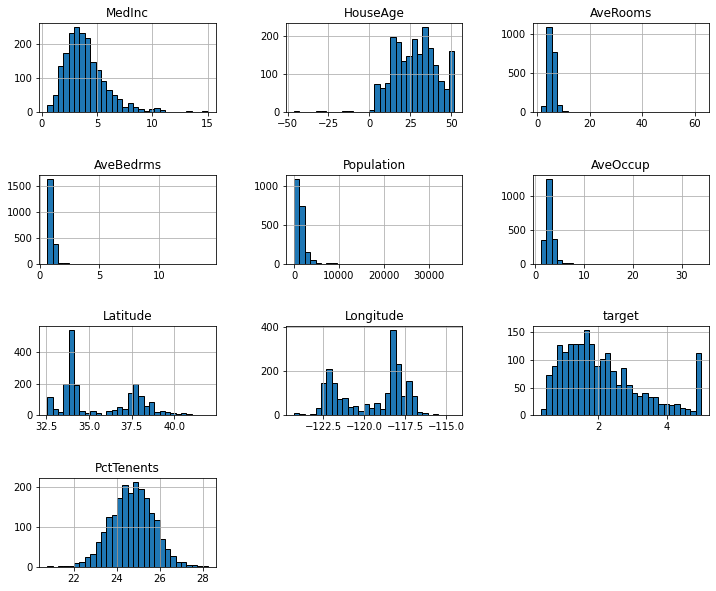

In [86]:
import matplotlib.pyplot as plt

X.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [87]:
X.AveOccup.value_counts()

2.459834    3
3.000000    3
2.000000    3
2.500000    3
3.035714    3
           ..
2.484472    1
3.355865    1
3.213823    1
2.273381    1
3.124413    1
Name: AveOccup, Length: 1944, dtype: int64

In [88]:
import pandas as pd
import seaborn as sns

rng = np.random.RandomState(0)
indices = rng.choice(X.index, size=500,
                     replace=False)

# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
subset = X.loc[indices]
# Quantize the target and keep the midpoint for each interval
subset["target"] = pd.qcut(subset["target"], 6, retbins=False)
subset["target"] = subset["target"].apply(lambda x: x.mid)

ValueError: cannot reindex from a duplicate axis

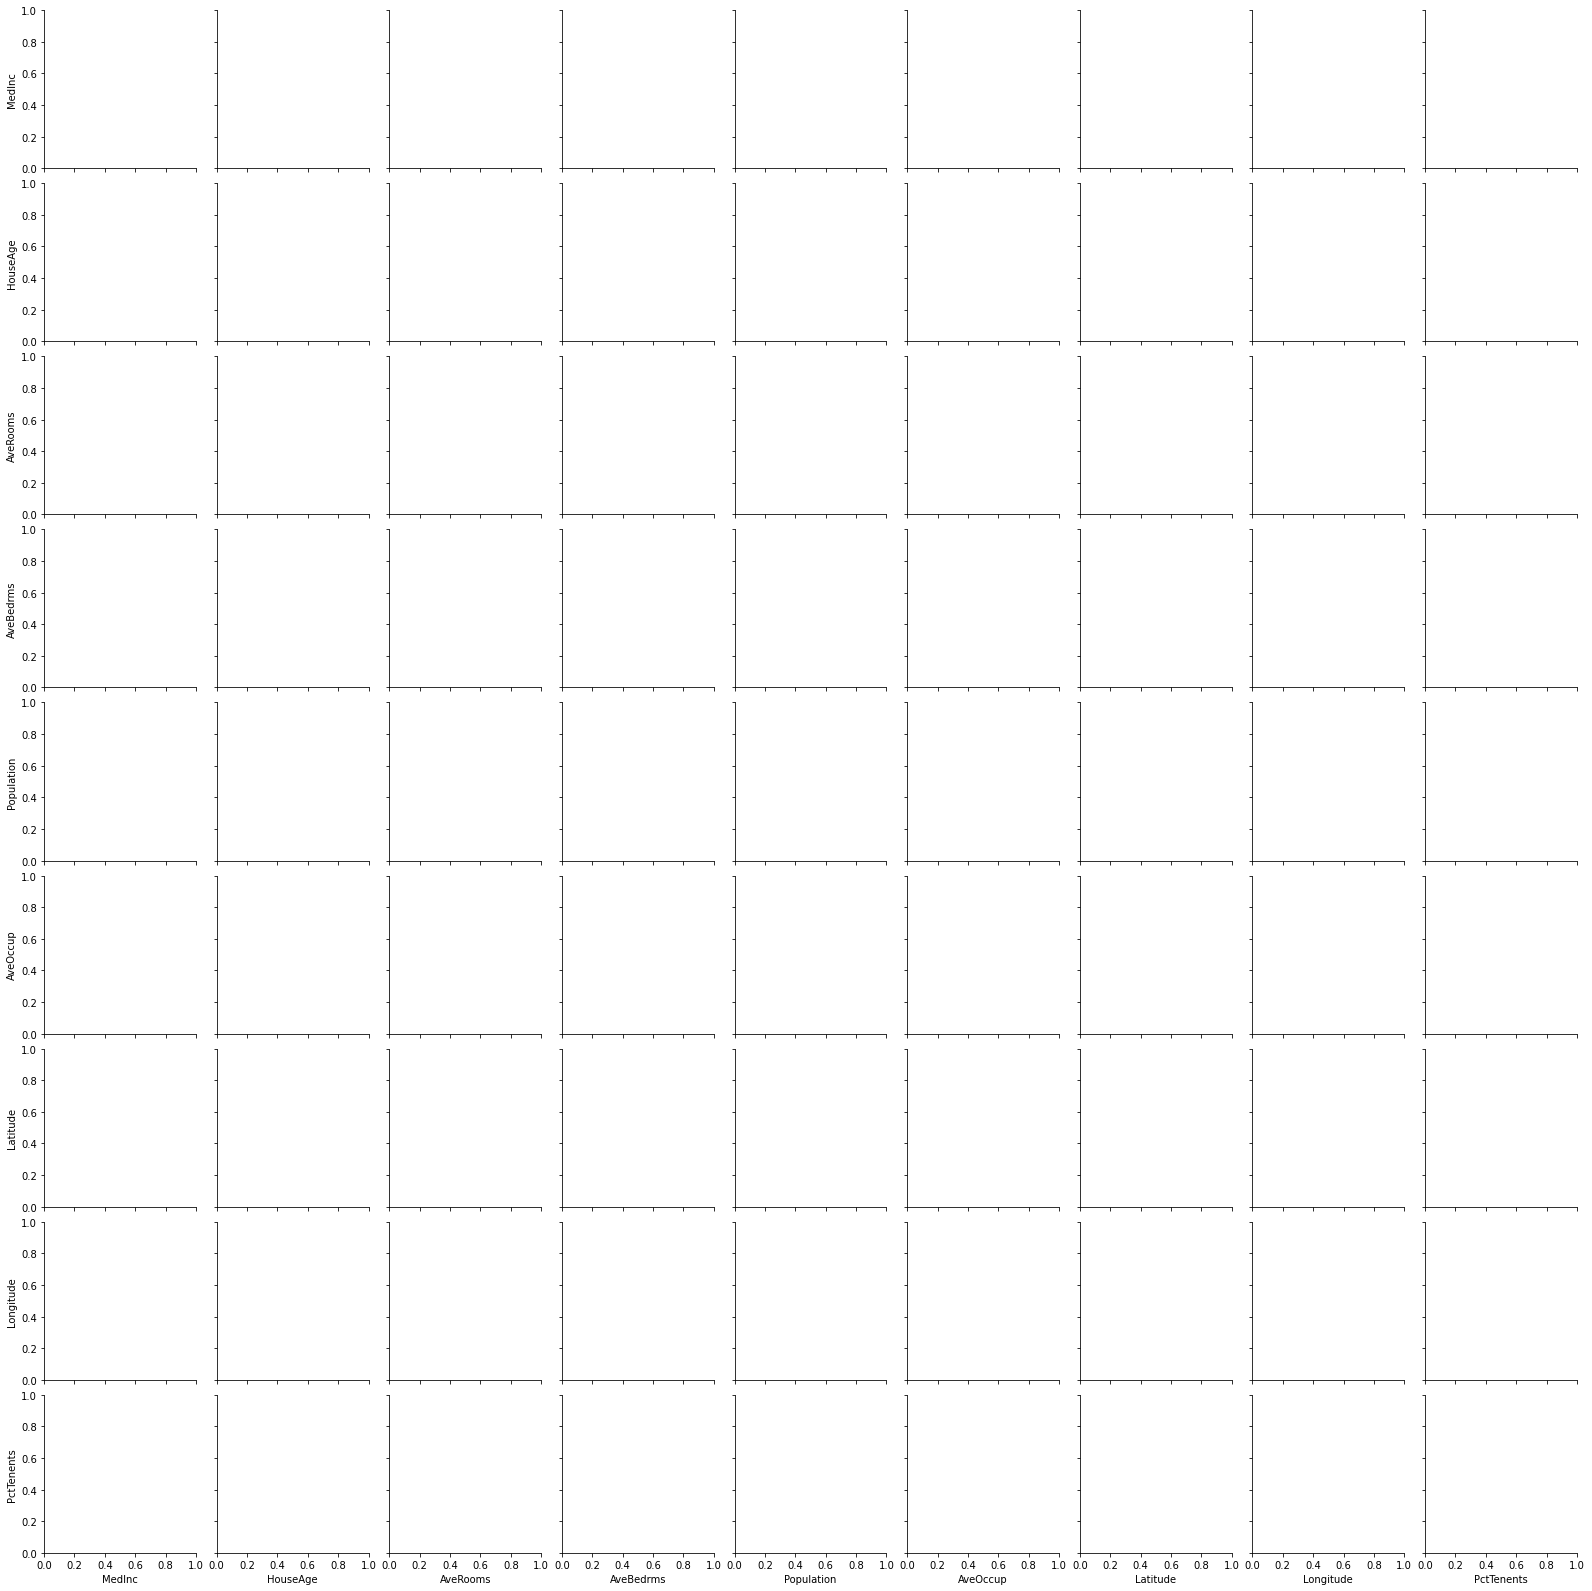

In [89]:
_ = sns.pairplot(data=subset, hue="target", palette="viridis")

In [90]:
X.to_csv("California_housing_nec.csv")

# Préparation du jeu de données 

Pour commencer ce TP nous allons utiliser les données du marché immobiliers en Californie. Le but est de prédire le prix immobilier d'une région de californie.

Récuperer le fichier csv disponible sur moodle et importer le. On mettra dans une variable $y$ la variable `target` et garderons les autres variables dans une matrice $X$. 

In [1]:
import pandas as pd
import numpy as np 
import sklearn

In [2]:
X = pd.read_csv("California_housing_nec.csv")
y = X["target"]
X.describe()
X = X.drop("target", 1)

/tmp/ipykernel_366650/777966859.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = X.drop("target", 1)


Explorer le jeu de données pour nettoyer les données: 

- traiter les valeurs NaN 
- traiter les valeurs abérantes 

Il y a plusieurs façon de traiter les données manquantes ou abérantes. Soient en retirant les features (ou ligne) qui sont concernés ou bien en remplaçant ces valeurs par des indicateurs statistiques (moyenne, médianne ...) des features concernées.

# Création de nouvelles features

Dans le cadre de la prédiction, chaque choix de variable va avoir de l'importance. 
Ainsi il va être parfois utile de modifier certaines variables : 
   - transformer en variables binaires des variables catégorielles ou continues
   - faire des transformations de certaines variables (comme appliquer les taux d'inflation à un prix)
   - catégoriser certaines variables continues (comme définir des tranches d'âge) 
   - ajouter des informations externes (la météo, positions géographiques, etc) 
   
Il y a mille façon de faire cela. Seule l'imagination et créativité de l'ingénieur fait office de limitation dans l'exploration de nouvelles features. 

Pour cette partie soyez créatifs! 

Justifier des features que vous souhaitez garder. Pour cela vous pouvez vous baser sur des outils statistiques pour les justifier. Par exemple, il n'est pas utile de garder deux features qui apportent la même information.

# Choix de l'algorithme

Il existe plusieurs algorithmes de regression. Pour ce TP nous nous conterons de ceux implémenter dans le package `sklearn`. 

Le but ici étant de faire la prédiction du prix des maisons californiennes, nous voulons donc améliorer notre score de prédiction. Afin de bien comparer toutes les démarches mises en place il faut fixer un environnement. Ici nous allons choisir la métrique [RMSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) pour ses bonnes propriétées. 
De plus, il est important d'avoir une baseline afin d'avoir déjà un score à améliorer. 
Dans notre cas nous allons utiliser la regression linéaire. 



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
LR = LinearRegression()
y_pred = LR.fit(X_train, y_train).predict(X_test)


In [14]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.5666151356233775

Il va être interessant ici de choisir le bon algorithme et les bonnes features. 

Ainsi les leviers d'action possible sont : 

- le choix de l'algorithme
- les hyperparamètres de l'algorithme choisi
- les features mises en entrée de l'algorithme (dans la variable X)

Ainsi afin d'améliorer votre prédiction, il va être interessant de revenir souvent sur vos choix afin d'améliorer vos modèles. 

## Validation croisée 

La validation croisée permet d'éviter l'overfitting. 

In [20]:
from sklearn.model_selection import cross_val_score
LR = LinearRegression()
print(np.mean(-1 * cross_val_score(LR, X, y, cv = 5, scoring = 'neg_mean_squared_error')))

0.5718398160092207


Afin de trouver les bons hyperparamètres, il va être important de faire une bonne grille de recherche de parmaètres. Pour cela, vous pouvez utiliser la fonction [GridSearchCV](https://scikit-learn.org/stable/modules/grid_search.html). 